# Student Information

Name: 王俊皓

Student ID: 112062649

GitGub ID: 92728539

Kaggle name: 
  - team name: OurStoRi/NTHU112062649
  - account name: mYstoRi

Kaggle private scoreboard snapshot: 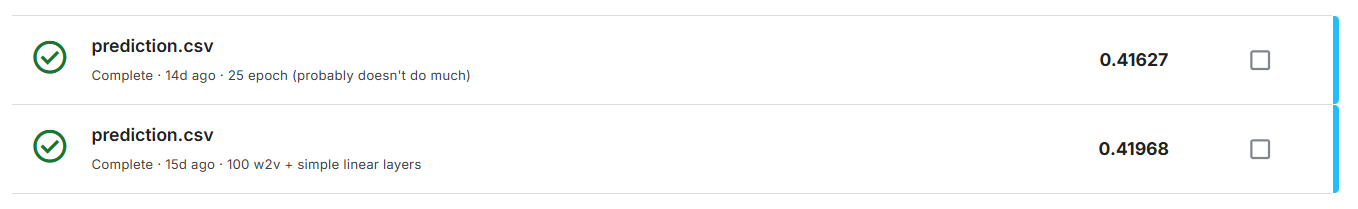

## load data and preprocess

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import json

In [2]:
dataset_dir = 'dataset/'

loading data

In [3]:
all_text_df = pd.read_json(dataset_dir + 'tweets_DM.json', lines=True)
all_text_df

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [4]:
# delete columns that are not informative (all same value)

del all_text_df['_index']
del all_text_df['_type']

In [5]:
# the _source is in json format. scrap the text and id fields out of it and store it in separate columns.

def scraptext(source):
    return source['tweet']['text']

def scrapid(source):
    return source['tweet']['tweet_id']

all_text_df['text'] = all_text_df['_source'].apply(scraptext)
all_text_df['id'] = all_text_df['_source'].apply(scrapid)
del all_text_df['_source'] # free up some space

loading the train/test split

In [6]:
split = pd.read_csv(dataset_dir + 'data_identification.csv').set_index('tweet_id')['identification'].to_dict()
split['0x28cc61']

'test'

In [7]:
all_text_df['split'] = all_text_df['id'].map(split)
all_text_df

,_score,_crawldate,text,id,split
0,391,2015-05-23 11:42:47,"People who post ""add me on #Snapchat"" must be ...",0x376b20,train
1,433,2016-01-28 04:52:09,"@brianklaas As we see, Trump is dangerous to #...",0x2d5350,train
2,232,2017-12-25 04:39:20,"Confident of your obedience, I write to you, k...",0x28b412,test
3,376,2016-01-24 23:53:05,Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,train
4,989,2016-01-08 17:18:59,"""Trust is not the same as faith. A friend is s...",0x2de201,test
...,...,...,...,...,...
1867530,827,2015-05-12 12:51:52,When you buy the last 2 tickets remaining for ...,0x316b80,test
1867531,368,2017-10-02 17:54:04,I swear all this hard work gone pay off one da...,0x29d0cb,test
1867532,498,2016-10-10 11:04:32,@Parcel2Go no card left when I wasn't in so I ...,0x2a6a4f,test
1867533,840,2016-09-02 14:25:06,"Ah, corporate life, where you can date <LH> us...",0x24faed,train


In [8]:
train_df = all_text_df[all_text_df['split'] == 'train']
test_df = all_text_df[all_text_df['split'] == 'test']
del all_text_df
del train_df['split']
del test_df['split']
print(f'training samples: {len(train_df)}')
print(f'testing samples: {len(test_df)}')

training samples: 1455563
testing samples: 411972


then we append the label to the train df

In [9]:
labels = pd.read_csv(dataset_dir + 'emotion.csv').set_index('tweet_id')['emotion'].to_dict()
train_df['emotion'] = train_df['id'].map(labels)
train_df

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,_score,_crawldate,text,id,emotion
0,391,2015-05-23 11:42:47,"People who post ""add me on #Snapchat"" must be ...",0x376b20,anticipation
1,433,2016-01-28 04:52:09,"@brianklaas As we see, Trump is dangerous to #...",0x2d5350,sadness
3,376,2016-01-24 23:53:05,Now ISSA is stalking Tasha 😂😂😂 <LH>,0x1cd5b0,fear
5,120,2015-06-11 04:44:05,@RISKshow @TheKevinAllison Thx for the BEST TI...,0x1d755c,joy
6,1021,2015-08-18 02:30:07,Still waiting on those supplies Liscus. <LH>,0x2c91a8,anticipation
...,...,...,...,...,...
1867526,94,2016-12-26 02:44:07,I'm SO HAPPY!!! #NoWonder the name of this sho...,0x321566,joy
1867527,627,2015-04-01 08:14:56,In every circumtance I'd like to be thankful t...,0x38959e,joy
1867528,274,2016-11-17 23:46:22,there's currently two girls walking around the...,0x2cbca6,joy
1867533,840,2016-09-02 14:25:06,"Ah, corporate life, where you can date <LH> us...",0x24faed,joy


## classification

For this homework, I started with a relatively simple model.

- Using nltk tokenizer and Word2Vec to generate embeddings of  each token.
- Then, use the **average** of all embeddings in a sentence to generate the final embedding of the sentence.
- Use a small multilayer perceptron as classifier to classify sequence into 8 possible classes.

This acheived a decent score of ~0.42.

In [10]:
import gensim
from tensorflow.keras.preprocessing.text import Tokenizer
import nltk

nltk.download('punkt')
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df['token_length'] = train_df['text'].apply(lambda x: len(x))
max_length = train_df['token_length'].max()
print(max_length)

training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


202


C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


array([list(['People', 'who', 'post', '``', 'add', 'me', 'on', '#', 'Snapchat', "''", 'must', 'be', 'dehydrated', '.', 'Cuz', 'man', '....', 'that', "'s", '<', 'LH', '>']),
       list(['@', 'brianklaas', 'As', 'we', 'see', ',', 'Trump', 'is', 'dangerous', 'to', '#', 'freepress', 'around', 'the', 'world', '.', 'What', 'a', '<', 'LH', '>', '<', 'LH', '>', '#', 'TrumpLegacy', '.', '#', 'CNN']),
       list(['Now', 'ISSA', 'is', 'stalking', 'Tasha', '😂😂😂', '<', 'LH', '>'])],
      dtype=object)

In [11]:
from gensim.models import Word2Vec

# hyperparameters
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

# model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

In [12]:
def sentence_embedding(tokens):
    s = np.zeros(vector_dim)
    for t in tokens:
        if t in word2vec_model.wv:
            s += word2vec_model.wv[t]
    s /= len(tokens)
    return s

X_train = train_df['text_tokenized'].apply(sentence_embedding)
X_train = np.stack(X_train.values)

X_train

array([[-0.27016072,  0.33818942, -1.69212676, ...,  0.8048316 ,
        -0.43175723, -0.18518403],
       [-0.47214523,  0.52837126, -1.78387939, ...,  0.53324692,
        -0.46946748,  0.15402299],
       [ 0.83925252,  0.64547279, -0.83474266, ...,  0.61699959,
        -0.40864921, -0.77180999],
       ...,
       [-0.3635265 ,  0.27385815, -0.56093014, ..., -0.08497208,
        -0.33685933, -0.10370188],
       [-0.60327923,  0.5822662 , -1.13055495, ...,  0.57257048,
        -0.89749688,  0.43787144],
       [-0.52877387,  0.89923137, -1.99219664, ...,  0.77621801,
        -0.41572634, -0.37786328]])

In [13]:
test_df['text_tokenized'] = test_df['text'].apply(lambda x: nltk.word_tokenize(x))
X_test = test_df['text_tokenized'].apply(sentence_embedding)
X_test = np.stack(X_test.values)

C:\Users\User\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [57]:
y_train = pd.get_dummies(train_df['emotion'])
y_test = np.zeros((X_test.shape[0], 8))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1455563, 100)
(1455563, 8)
(411972, 100)
(411972, 8)


train/test generators to help with limited memory

In [58]:
epochs = 25
batch_size = 16
learning_rate = 0.01 # not functional atm

In [59]:
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train, y_train, batch_size)
test_gen = DataGenerator(X_test, y_test, batch_size)

In [60]:
for test1, test2 in train_gen:
    print(test1)
    print(test2)
    break

[[-0.27016072  0.33818942 -1.69212676 ...  0.8048316  -0.43175723
  -0.18518403]
 [-0.47214523  0.52837126 -1.78387939 ...  0.53324692 -0.46946748
   0.15402299]
 [ 0.83925252  0.64547279 -0.83474266 ...  0.61699959 -0.40864921
  -0.77180999]
 ...
 [-0.58194495  0.79526537 -0.79201595 ...  0.59906261 -0.76263964
   0.1911658 ]
 [-0.08171081  0.65802381 -0.89767754 ... -0.22589033 -0.81494005
   0.37768428]
 [-0.2602329  -0.4984562  -0.73629155 ...  0.29570149 -0.19513316
   0.14786392]]
    anger  anticipation  disgust  fear  joy  sadness  surprise  trust
0       0             1        0     0    0        0         0      0
1       0             0        0     0    0        1         0      0
3       0             0        0     1    0        0         0      0
5       0             0        0     0    1        0         0      0
6       0             1        0     0    0        0         0      0
7       0             0        0     0    1        0         0      0
8       0         

In [61]:
# checking gpu availability
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import HeNormal

# just a simple MLP with 2 hidden layers, with 512, 64 neurons respectively

model = Sequential()
model.add(Dense(512, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(64, activation='relu', kernel_initializer=HeNormal()))
model.add(Dense(8, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [63]:
model.fit(train_gen, epochs=epochs, batch_size=batch_size)

Epoch 1/25
90973/90973 [==============================] - 253s 3ms/step - loss: 1.3630 - accuracy: 0.5015
Epoch 2/25
90973/90973 [==============================] - 251s 3ms/step - loss: 1.3250 - accuracy: 0.5171
Epoch 3/25
90973/90973 [==============================] - 252s 3ms/step - loss: 1.3148 - accuracy: 0.5211
Epoch 4/25
90973/90973 [==============================] - 251s 3ms/step - loss: 1.3096 - accuracy: 0.5236
Epoch 5/25
90973/90973 [==============================] - 252s 3ms/step - loss: 1.3063 - accuracy: 0.5249
Epoch 6/25
90973/90973 [==============================] - 253s 3ms/step - loss: 1.3042 - accuracy: 0.5262
Epoch 7/25
90973/90973 [==============================] - 251s 3ms/step - loss: 1.3035 - accuracy: 0.5271
Epoch 8/25
90973/90973 [==============================] - 252s 3ms/step - loss: 1.3012 - accuracy: 0.5279
Epoch 9/25
90973/90973 [==============================] - 253s 3ms/step - loss: 1.2994 - accuracy: 0.5285
Epoch 10/25
90973/90973 [=====================

## Output

In [64]:
y_pred = model.predict(test_gen)
y_pred

25749/25749 [==============================] - 28s 1ms/step


array([[9.8100118e-04, 8.9025015e-01, 9.0941042e-04, ..., 3.0529734e-03,
        5.7068473e-04, 2.2451924e-02],
       [2.5951457e-03, 7.1532816e-01, 1.2567798e-03, ..., 4.0807910e-03,
        1.0000638e-03, 7.8386992e-02],
       [1.4934844e-02, 3.5782865e-01, 3.1886961e-02, ..., 1.8204361e-01,
        5.2397572e-02, 8.3831750e-02],
       ...,
       [3.1465594e-02, 4.8731565e-02, 2.0320472e-01, ..., 4.4760394e-01,
        9.8243900e-02, 3.1843487e-02],
       [4.8674464e-02, 3.0874630e-02, 8.2688957e-02, ..., 1.6228706e-01,
        3.0085878e-02, 1.3296527e-01],
       [1.1981687e-01, 8.9540491e-03, 2.1950313e-01, ..., 3.7696031e-01,
        4.8355576e-02, 4.0536754e-02]], dtype=float32)

In [65]:
# export the output for submission

output_df = pd.DataFrame()
output_df['id'] = test_df['id']
output_df = output_df.reset_index()
del output_df['index']
output_df['emotion'] = pd.DataFrame(y_pred, columns=y_train.columns).idxmax(axis=1)
display(output_df)

,id,emotion
0,0x28b412,anticipation
1,0x2de201,anticipation
2,0x218443,anticipation
3,0x2939d5,joy
4,0x26289a,anticipation
...,...,...
411967,0x2913b4,anticipation
411968,0x2a980e,anticipation
411969,0x316b80,sadness
411970,0x29d0cb,joy


In [66]:
output_df.to_csv('prediction.csv', index=False)